In [ ]:
''' 
По данной работе необходимо подготовить отчет в формате блокнота Jupyter 
Notebook (.ipynb) либо в текстовом виде (.pdf). В отчете должны быть: 
1) исходные коды 
2) результаты выполнения. 

Для визуализации можно использовать любые библиотеки на свой выбор, но matplotlib и seaborn
обязательно продемонстрировать хотя бы 2 разных (например, ). 

1. Загрузите данные из файла «weather1.csv» о погоде в Перми. Загрузите только 
следующие столбцы: 
a. Местное время в Перми 
b. T (температура воздуха в градусах Цельсия) 
c. P (атмосферное давление в мм.рт.ст.) 
d. U (относительная влажность в %) 
e. Ff (скорость ветра в м/с) 
f. N (облачность) 
g. H (высота основания облаков, м) 
h. VV (горизонтальная дальность видимости в км) 
2. (1 балл) Постройте точечную диаграмму (диаграмму рассеяния) по признакам 
температуры и относительной влажности. 
3. (1 балл) На построенной в предыдущем пункте диаграмме выделите точки 
разными цветами в зависимости от облачности: синим – для которых облачность 
составляет 100%; красным – все остальные. 
4. (1 балл) Постройте линейную диаграмму (график) изменения температуры в 
зависимости от местного времени. 
5. (2 балла) Посчитайте по имеющимся данным среднемесячную температуру и 
постройте столбчатую диаграмму (вертикальную) зависимости средней 
температуры от месяца. Подсказка: создайте отдельный столбец с номером месяца 
(вычислив его из столбца «Местное время»), а затем сгруппируйте данные по 
этому столбцу. 
6. (1 балл) Постройте ленточную диаграмму (горизонтальную), отразив на ней 
количество имеющихся наблюдений для каждого варианта облачности. 
7. (1 балл) Постройте гистограмму частот для температуры. На гистограмме должно 
быть 10 диапазонов температуры. 
8. (2 балла) Разбейте данные на 3 группы по значению горизонтальной дальности 
видимости (одна группа – дальность видимости менее 5 км, вторая – от 5 до 
15 км(включительно), третья – более 15 км). В одной области для каждой группы 
постройте boxplot (диаграмму «ящик с усами») для признака «атмосферное 
давление». 
9. (1 балл) Постройте круговую диаграмму для признака «высота основания 
облаков».
'''

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1. Загрузите данные из файла «weather1.csv» о погоде в Перми. Загрузите только следующие столбцы: 
#a. Местное время в Перми 
#b. T (температура воздуха в градусах Цельсия) 
#c. P (атмосферное давление в мм.рт.ст.) 
#d. U (относительная влажность в %) 
#e. Ff (скорость ветра в м/с) 
#f. N (облачность) 
#g. H (высота основания облаков, м) 
#h. VV (горизонтальная дальность видимости в км)

data = pd.read_csv("weather1.csv", encoding='utf-8', engine='python', sep=None, usecols=['Местное время в Перми', 'T', 'P', 'U', 'Ff', 'N', 'H', 'VV'])
data['Местное время в Перми'] = pd.to_datetime(data['Местное время в Перми'], dayfirst=True) # # Преобразование столбца "Местное время в Перми" в формат datetime
print('Информация о загруженных данных:')
print(data.info())
print('Вывод первых 5 строк:')
data.head(5)

Информация о загруженных данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Местное время в Перми  2919 non-null   datetime64[ns]
 1   T                      2919 non-null   float64       
 2   P                      2917 non-null   float64       
 3   U                      2919 non-null   int64         
 4   Ff                     2919 non-null   int64         
 5   N                      2916 non-null   object        
 6   H                      2551 non-null   object        
 7   VV                     2917 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 182.6+ KB
None
Вывод первых 5 строк:


,Местное время в Перми,T,P,U,Ff,N,H,VV
0,2021-12-31 23:00:00,-9.8,762.5,83,3,100%.,600-1000,4.0
1,2021-12-31 20:00:00,-10.6,764.2,81,3,100%.,1000-1500,4.0
2,2021-12-31 17:00:00,-11.6,765.5,79,2,"90 или более, но не 100%",1000-1500,10.0
3,2021-12-31 14:00:00,-11.9,766.7,77,1,100%.,1000-1500,20.0
4,2021-12-31 11:00:00,-13.6,767.5,79,1,100%.,1000-1500,10.0


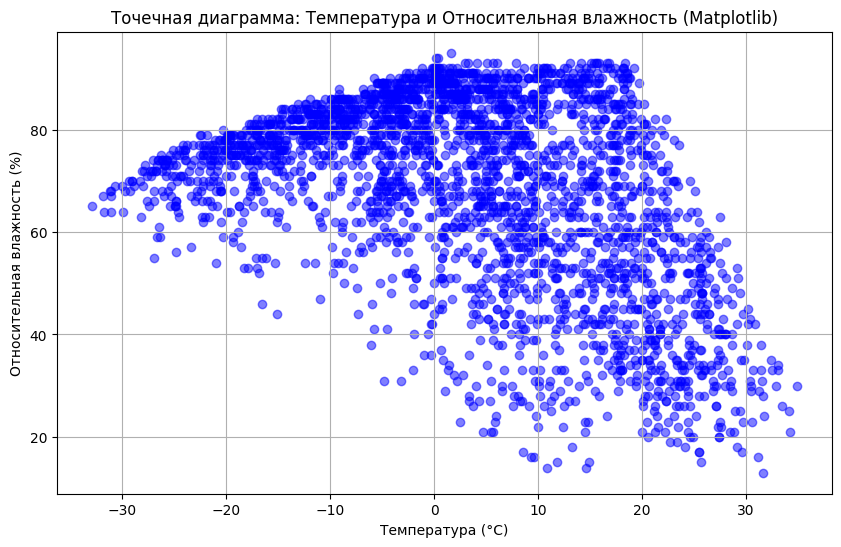

In [3]:
#2. (1 балл) Постройте точечную диаграмму (диаграмму рассеяния) по признакам 
# температуры и относительной влажности. 

# Примечание, для удобства восприятия, визуализаторы с помощью библиотеки Matplotlib - будут синими,
# а с помощью библиотеки Seaborn - красными, в заданиях, где не задан цвет.

# Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(data['T'], data['U'], color='blue', alpha=0.5)
plt.title('Точечная диаграмма: Температура и Относительная влажность (Matplotlib)')
plt.xlabel('Температура (°C)')
plt.ylabel('Относительная влажность (%)')
plt.grid()
plt.show()

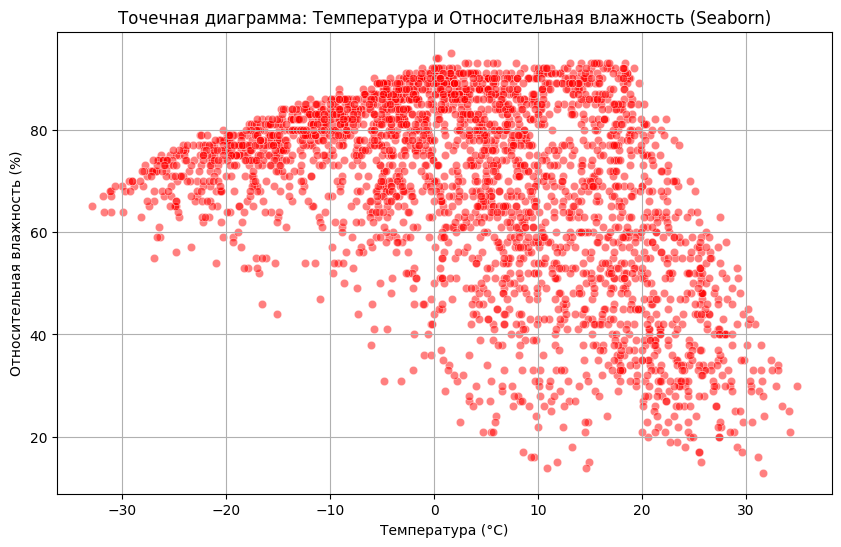

In [4]:
# Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='T', y='U', data=data, color='red', alpha=0.5)
plt.title('Точечная диаграмма: Температура и Относительная влажность (Seaborn)')
plt.xlabel('Температура (°C)')
plt.ylabel('Относительная влажность (%)')
plt.grid()
plt.show()

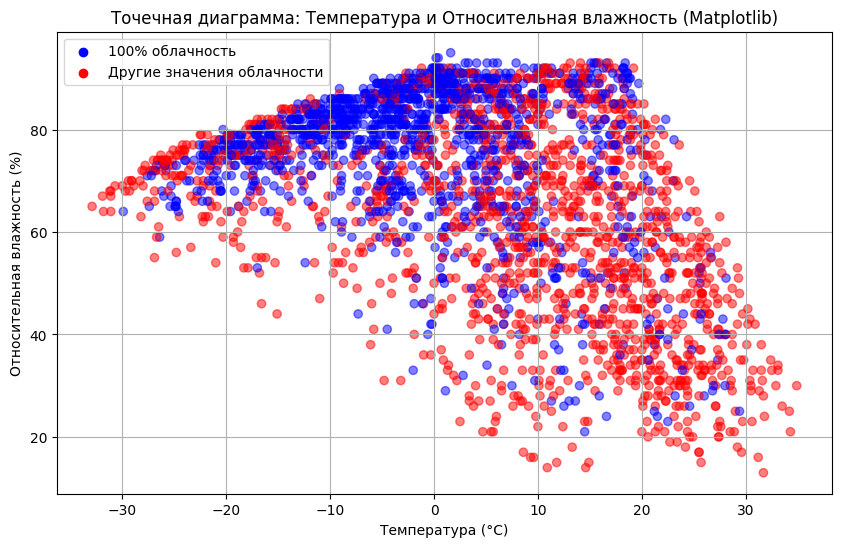

In [5]:
#3. (1 балл) На построенной в предыдущем пункте диаграмме выделите точки 
#разными цветами в зависимости от облачности: синим – для которых облачность 
#составляет 100%; красным – все остальные. 

# Matplotlib
colors = data['N'].apply(lambda x: 'blue' if x == '100%.' else 'red')
plt.figure(figsize=(10, 6))
plt.scatter(data['T'], data['U'], color=colors, alpha=0.5)
plt.title('Точечная диаграмма: Температура и Относительная влажность (Matplotlib)')
plt.xlabel('Температура (°C)')
plt.ylabel('Относительная влажность (%)')
plt.scatter([], [], c='blue', label='100% облачность', alpha=1)
plt.scatter([], [], c='red', label='Другие значения облачности', alpha=1)
plt.legend()
plt.grid()
plt.show()

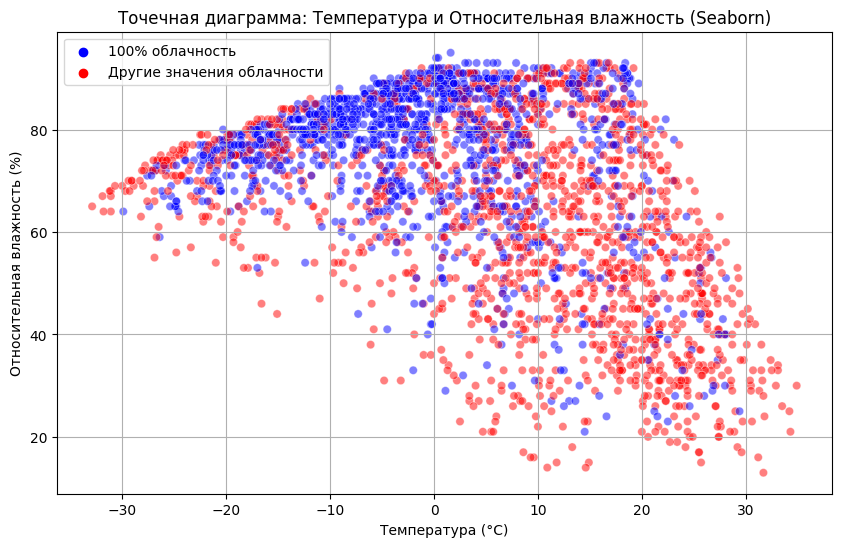

In [6]:
# Seaborn
colors = data['N'].apply(lambda x: 'blue' if x == '100%.' else 'red')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='T', y='U', data=data, color=colors, alpha=0.5)
plt.title('Точечная диаграмма: Температура и Относительная влажность (Seaborn)')
plt.xlabel('Температура (°C)')
plt.ylabel('Относительная влажность (%)')
plt.scatter([], [], c='blue', label='100% облачность', alpha=1)
plt.scatter([], [], c='red', label='Другие значения облачности', alpha=1)
plt.legend()
plt.grid()
plt.show()

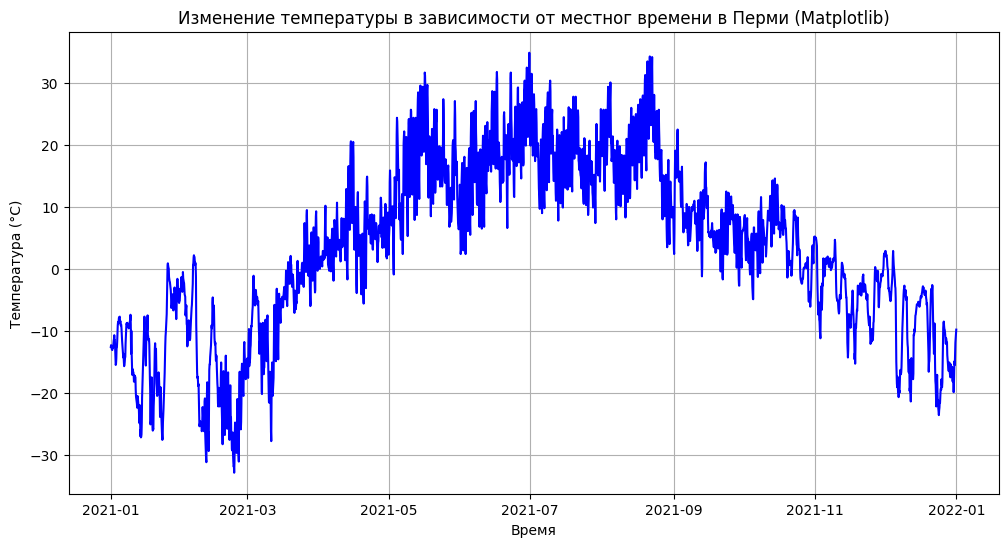

In [7]:
#4. (1 балл) Постройте линейную диаграмму (график) изменения температуры в 
#зависимости от местного времени.

# Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(data['Местное время в Перми'], data['T'], color='blue', alpha=1)
plt.title('Изменение температуры в зависимости от местног времени в Перми (Matplotlib)')
plt.xlabel('Время')
plt.ylabel('Температура (°C)')
plt.grid()
plt.show()


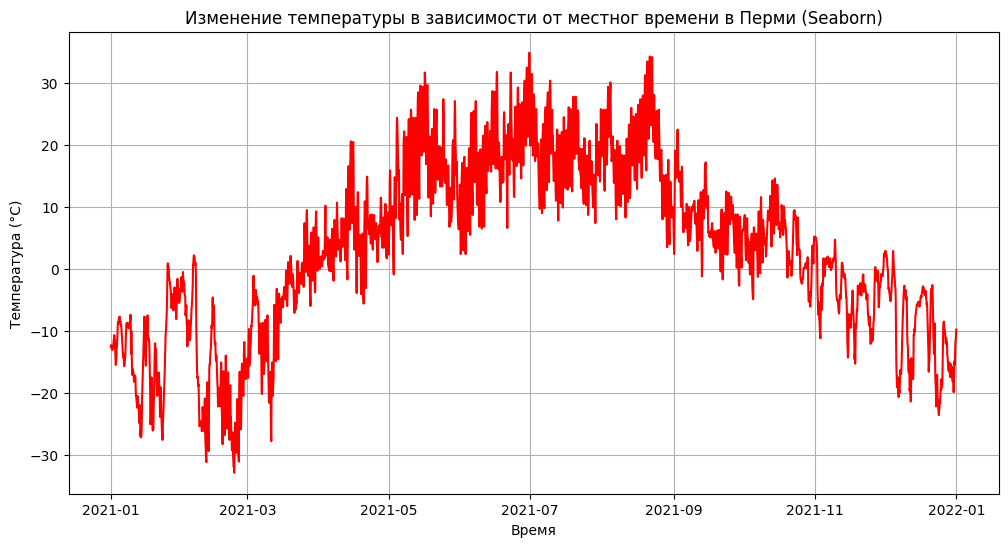

In [8]:
# Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Местное время в Перми', y='T', data=data, color='red', alpha=1)
plt.title('Изменение температуры в зависимости от местног времени в Перми (Seaborn)')
plt.xlabel('Время')
plt.ylabel('Температура (°C)')
plt.grid()
plt.show()

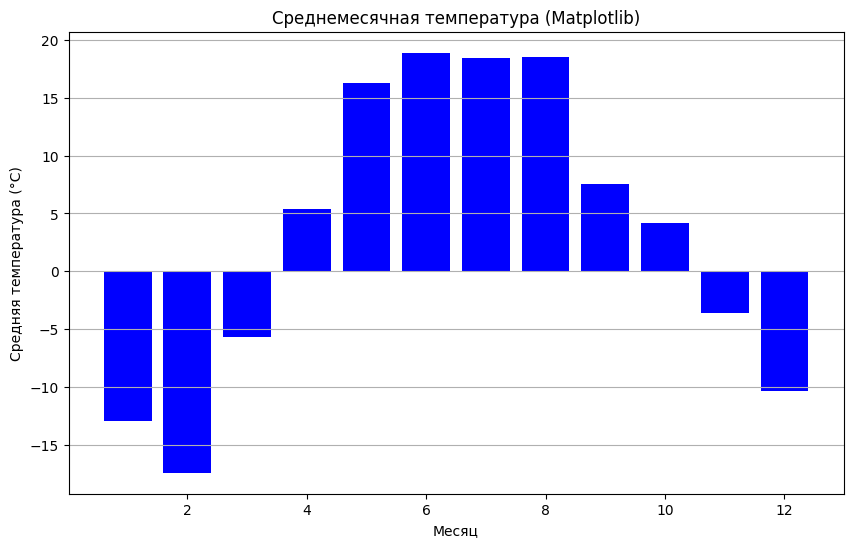

In [9]:
#5. (2 балла) Посчитайте по имеющимся данным среднемесячную температуру и 
#постройте столбчатую диаграмму (вертикальную) зависимости средней 
#температуры от месяца. Подсказка: создайте отдельный столбец с номером месяца 
#(вычислив его из столбца «Местное время»), а затем сгруппируйте данные по этому столбцу. 

data['Месяц'] = data['Местное время в Перми'].dt.month
monthly_avg = data.groupby('Месяц')['T'].mean()

# Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg.index, monthly_avg.values, color='blue', alpha=1)
plt.title('Среднемесячная температура (Matplotlib)')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

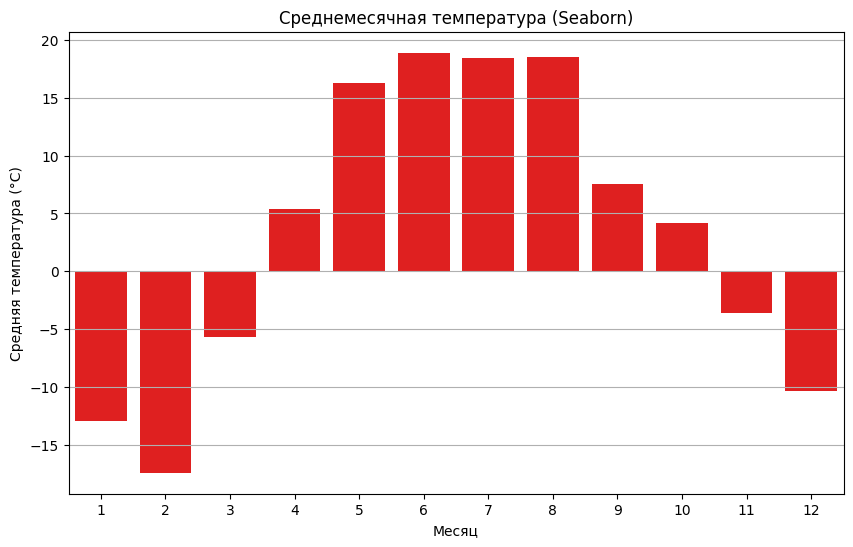

In [10]:
# Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, color='red', alpha=1)
plt.title('Среднемесячная температура (Seaborn)')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

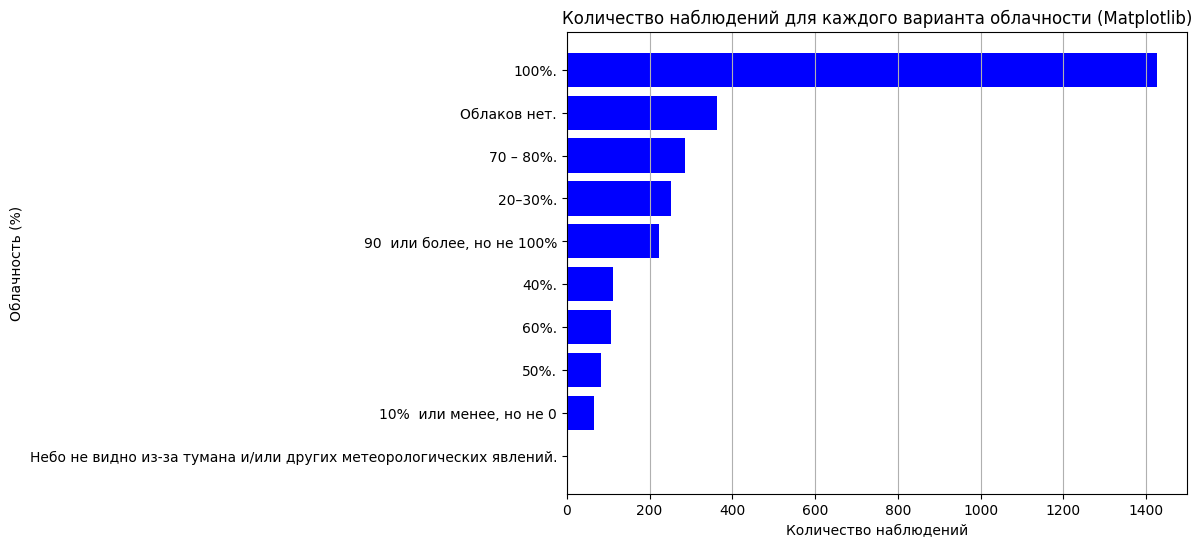

In [11]:
#6. (1 балл) Постройте ленточную диаграмму (горизонтальную), отразив на ней 
#количество имеющихся наблюдений для каждого варианта облачности. 

counts_N = data['N'].value_counts().sort_values() # Подсчёт количества наблюдений и сортировка по значению

# Matplotlib
plt.figure(figsize=(8, 6))
plt.barh(counts_N.index, counts_N.values, color='blue', alpha=1)
plt.title('Количество наблюдений для каждого варианта облачности (Matplotlib)')
plt.xlabel('Количество наблюдений')
plt.ylabel('Облачность (%)')
plt.grid(axis='x')
plt.show()

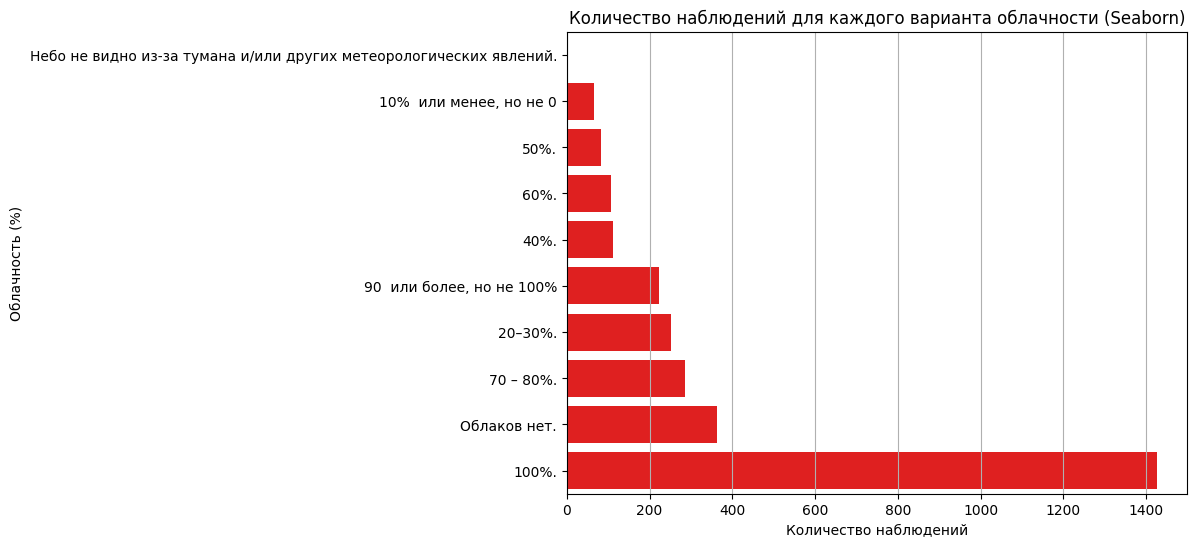

In [12]:
# Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=counts_N.values, y=counts_N.index, color= 'red', alpha=1)
plt.title('Количество наблюдений для каждого варианта облачности (Seaborn)')
plt.xlabel('Количество наблюдений')
plt.ylabel('Облачность (%)')
plt.grid(axis='x')
plt.show()

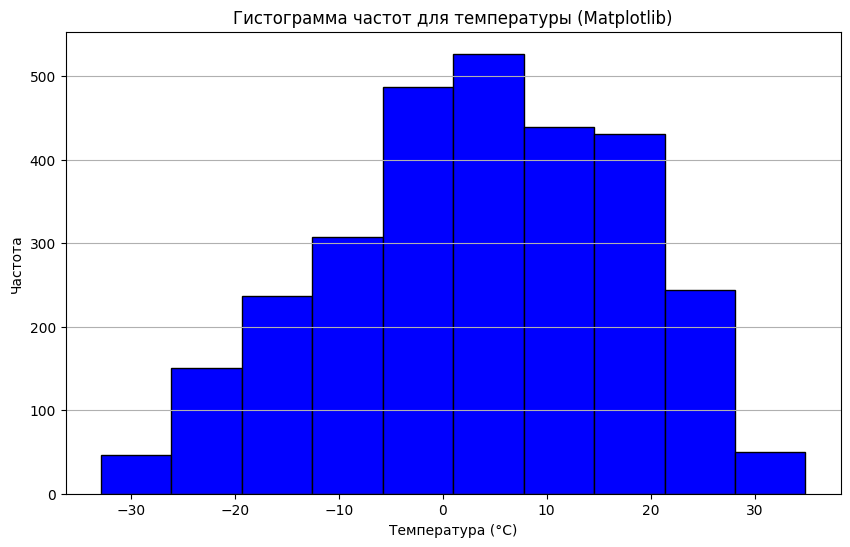

In [13]:
#7. (1 балл) Постройте гистограмму частот для температуры. На гистограмме должно 
#быть 10 диапазонов температуры.

# Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(data['T'], bins=10, color='blue', edgecolor='black', alpha=1)
plt.title('Гистограмма частот для температуры (Matplotlib)')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

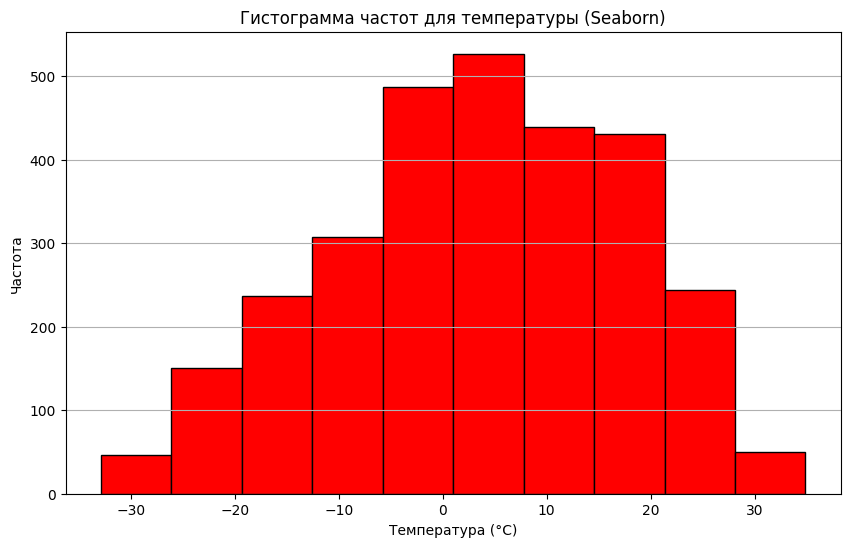

In [14]:
# Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data['T'], bins=10, color='red', alpha=1)
plt.title('Гистограмма частот для температуры (Seaborn)')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

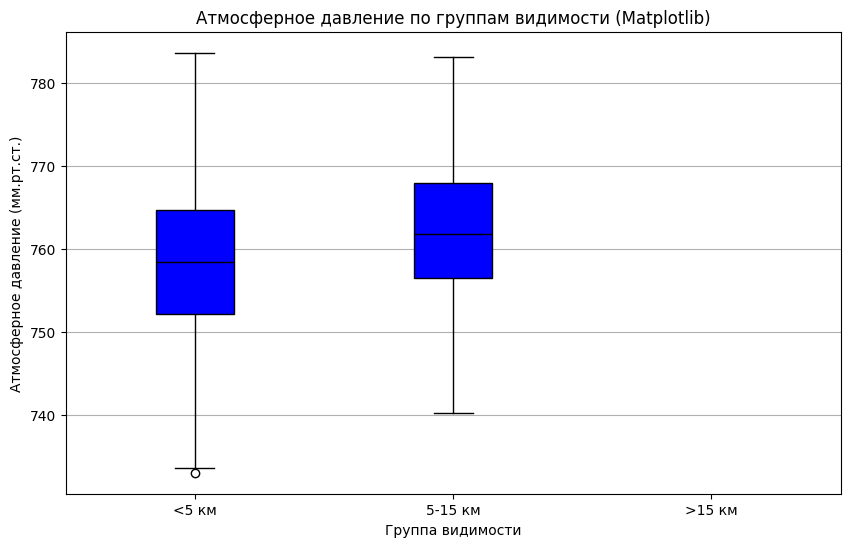

Проверьте наличие NaN значений: 
Местное время в Перми      0
T                          0
P                          2
U                          0
Ff                         0
N                          3
H                        368
VV                         2
Месяц                      0
Группа видимости           0
dtype: int64


In [15]:
#8. (2 балла) Разбейте данные на 3 группы по значению горизонтальной дальности 
#видимости (одна группа – дальность видимости менее 5 км, вторая – от 5 до 
#15 км(включительно), третья – более 15 км). В одной области для каждой группы 
#постройте boxplot (диаграмму «ящик с усами») для признака «атмосферное давление». 
# Примечание ">15 км" изначально не отображалось, проблема была

def categorize(vv):
    if vv < 5:
        return '<5 км'
    elif 5 <= vv <= 15:
        return '5-15 км'
    else:
        return '>15 км'
data['Группа видимости'] = data['VV'].apply(categorize)

# Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['Группа видимости'] == group]['P'] for group in data['Группа видимости'].unique()],tick_labels=data['Группа видимости'].unique(), patch_artist=True, boxprops=dict(facecolor='blue'), medianprops=dict(color='black')  )
plt.title('Атмосферное давление по группам видимости (Matplotlib)')
plt.suptitle('')
plt.xlabel('Группа видимости')
plt.ylabel('Атмосферное давление (мм.рт.ст.)')
plt.grid(axis='y')
plt.show()

# Примечание: группа '>15' не отображается, причина: 2 строки с NaN значением в 'P' (смотреть таблицу снизу).
# Из вывода видно, что и в столбц 'VV' 2 строки из 2919 содержат NaN и 'N' содержит 3 NaN  - это маленький процент, 
# поэтому было принято решение не исправлять выведенные раньше результаты.
# В 'H' 368 из 2919 строк содержат NaN значение, 'H' используется только в 9 задание (т.е. следуещем), решение по этому поводу будет прокоментированно там
# Проверьте наличие NaN значений:
print(f'Проверьте наличие NaN значений: \n{data.isnull().sum()}')

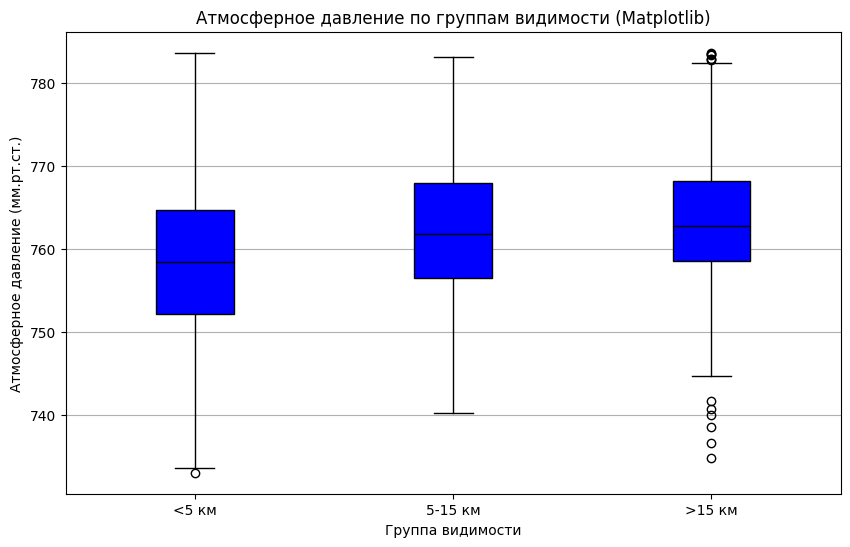

In [16]:
# Создаем список данных для boxplot, игнорируя NaN в 'P'
boxplot_data = [data[data['Группа видимости'] == group]['P'].dropna() for group in data['Группа видимости'].unique()]
# Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, tick_labels=data['Группа видимости'].unique(), patch_artist=True, boxprops=dict(facecolor='blue'), medianprops=dict(color='black'))
plt.title('Атмосферное давление по группам видимости (Matplotlib)')
plt.xlabel('Группа видимости')
plt.ylabel('Атмосферное давление (мм.рт.ст.)')
plt.grid(axis='y')
plt.show()

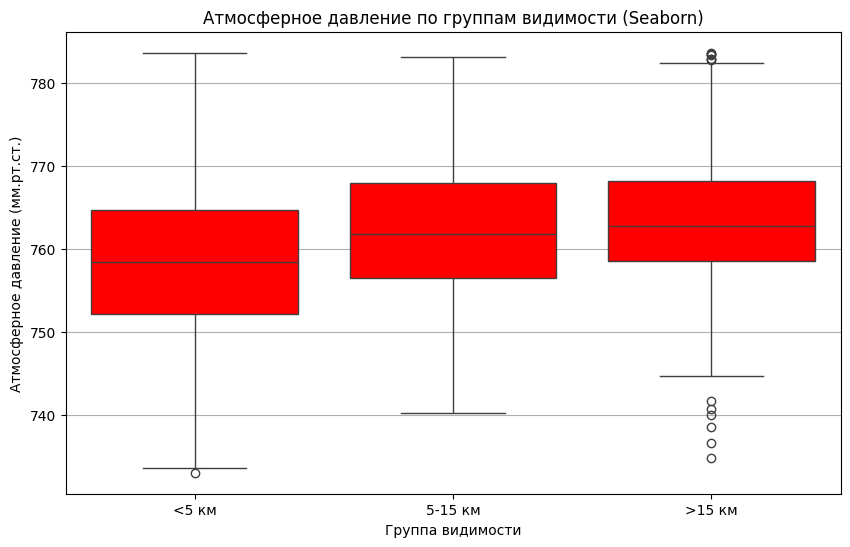

In [ ]:
# Seaborn
# Примечание: в Seaborn всё работает нормально, видимо обработка NaN значения встроена в функцию
plt.figure(figsize=(10, 6))
sns.boxplot(x='Группа видимости', y='P', data=data, boxprops=dict(facecolor='red'))
plt.title('Атмосферное давление по группам видимости (Seaborn)')
plt.xlabel('Группа видимости')
plt.ylabel('Атмосферное давление (мм.рт.ст.)')
plt.grid(axis='y')
plt.show()

In [18]:
#9. (1 балл) Постройте круговую диаграмму для признака «высота основания облаков».
# Примечание: В библиотеке Seaborn нет встроенной функции для создания круговых диаграм, поэтому в этом задании будет использоваться только библиотека Matplotlib.
height_counts = data['H'].value_counts(dropna=False) # С учётом NaN (dropna=False), если не писать NaN не учитывается по умолчанию

# Выводим количество уникальных значений для каждой категории
for value, count in height_counts.items():
    print(f'{value}: {count}')
# Примечание: было принято решение выводить 2 круговые диаграммы, с учётом NaN и без, 
# так как количество NaN весьма большое - 368/2919*100 = 12,6 % от общего числа.

600-1000: 778
1000-1500: 565
2000-2500: 516
nan: 368
2500 или более, или облаков нет.: 347
300-600: 290
200-300: 43
100-200: 12


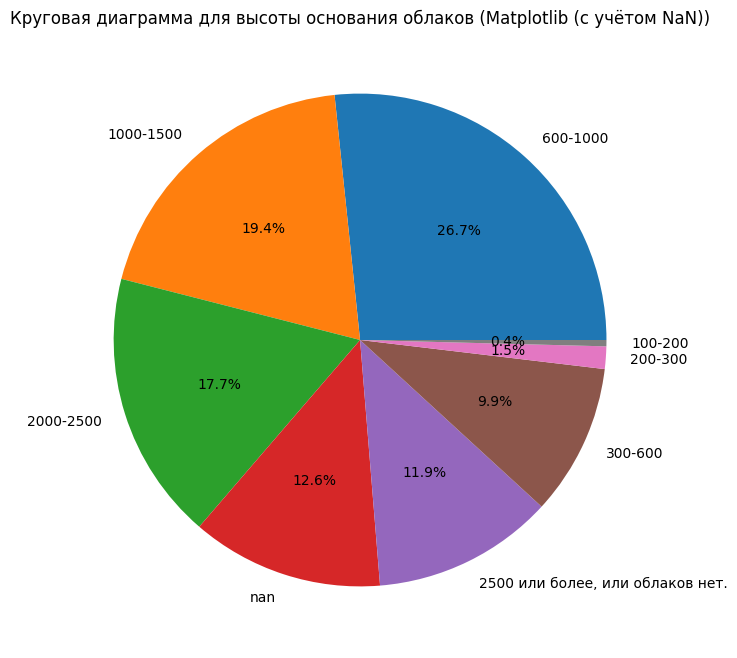

In [19]:
# Matplotlib (с учётом NaN)
plt.figure(figsize=(8, 8))
plt.pie(height_counts, labels=height_counts.index, autopct='%1.1f%%')
plt.title('Круговая диаграмма для высоты основания облаков (Matplotlib (с учётом NaN))')
plt.show()

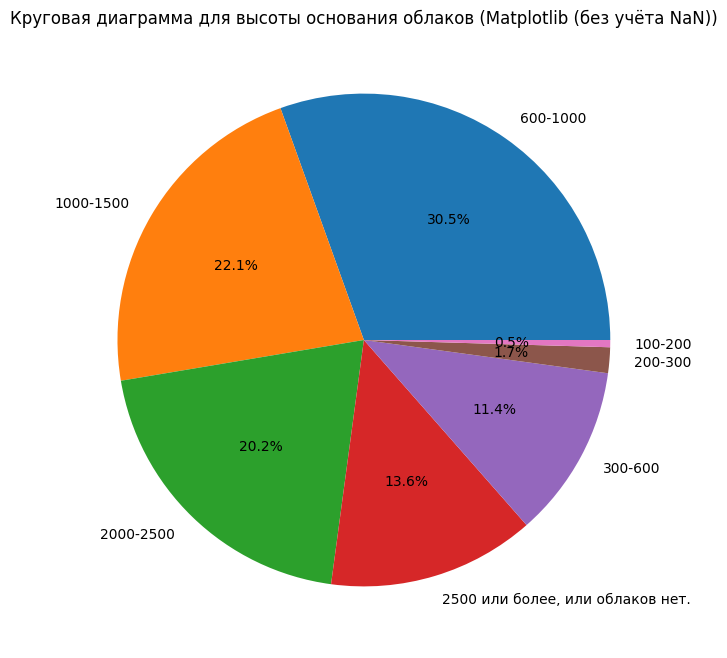

In [20]:
# Matplotlib (без учёта NaN)
height_counts2 = data['H'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(height_counts2, labels=height_counts2.index, autopct='%1.1f%%')
plt.title('Круговая диаграмма для высоты основания облаков (Matplotlib (без учёта NaN))')
plt.show()